## Smile Detection

First we fetch and save the path of our images.

In [1]:
import os
import fnmatch

def list_all_files(directory, extensions=None):
    for root, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            base, ext = os.path.splitext(filename)
            joined = os.path.join(root, filename)
            if extensions is None or ext.lower() in extensions:
                yield joined

negative_paths = list(list_all_files('Dataset/Negatives/', ['.jpg']))
positive_paths = list(list_all_files('Dataset/Positives/', ['.jpg']))
print (negative_paths[1])
examples = [(path, 0) for path in negative_paths] + [(path, 1) for path in positive_paths]
print (examples[3000])


Dataset/Negatives/negatives7/6400.jpg
('Dataset/Negatives/negatives7/2612.jpg', 0)


Now we read our images, convert them from RGB to Grayscale and resize them all to be 180*192 pixels.

float32 0.0 1.0 (13165, 64, 60)
int32 0 1 (13165,)


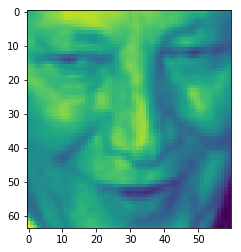

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from skimage.io import imread
from skimage.measure import block_reduce

flag = False
x_train = []
y_train = []

for path,label in examples :
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image,(180,192))
    image = block_reduce(image, block_size=(3, 3), func=np.mean)
    if flag == False :
        imgplot = plt.imshow(image)
        flag = True
    x_train.append(image)
    y_train.append(label)

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x_train = x_train.astype(np.float32) / 255.
y_train = y_train.astype(np.int32)
print (x_train.dtype, x_train.min(), x_train.max(), x_train.shape)
print (y_train.dtype, y_train.min(), y_train.max(), y_train.shape)

Now we convert our labels to vector format so we can add categories later.

In [3]:
from keras.utils import np_utils
number_of_categories = 2
y_train = np_utils.to_categorical(y_train, number_of_categories).astype(np.float32)

#shuffle data
indices = np.arange(len(x_train))
temp_x = x_train
temp_y = y_train
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]



Using TensorFlow backend.


[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]


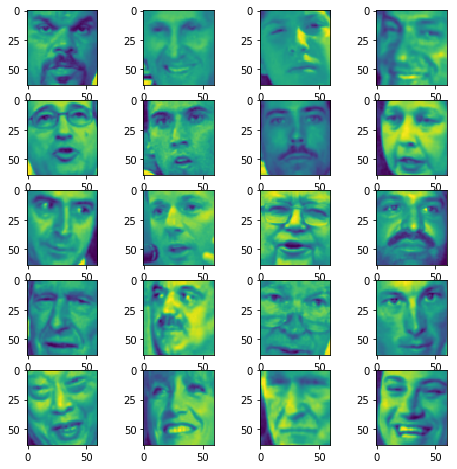

In [4]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = x_train[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    print(y_train[i])
plt.show()


Now we split our data for train and test, and then we build our CNN model. 

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split
x_train = np.expand_dims(x_train, axis=-1)
(trainX, testX, trainY, testY) = train_test_split(x_train, y_train, test_size=0.20, random_state=1)



filters = 32
conv_size = 3
pool_size = 2
print(trainX.shape)
network = Sequential()
network.add(layers.Conv2D(filters,(conv_size,conv_size),activation="relu",input_shape=trainX.shape[1:]))
network.add(layers.MaxPooling2D((pool_size,pool_size)))
network.add(layers.Conv2D(filters*2,(conv_size,conv_size),activation="relu"))
network.add(layers.MaxPooling2D((pool_size,pool_size)))
network.add(layers.Conv2D(filters,(conv_size,conv_size),activation="relu"))
network.add(layers.MaxPooling2D((pool_size,pool_size)))
network.add(layers.Flatten())
network.add(Dense(64, activation='relu'))
network.add(Dense(number_of_categories, activation='softmax'))

network.summary()

(10532, 64, 60, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 58, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 29, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 960)               0 

## Compile Model

In [6]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = network.fit(trainX, trainY, epochs=10)

Epoch 1/10
10532/10532 [==============================] - 36s 3ms/step - loss: 0.4177 - acc: 0.8151
Epoch 2/10
10532/10532 [==============================] - 32s 3ms/step - loss: 0.2820 - acc: 0.8872
Epoch 3/10
10532/10532 [==============================] - 34s 3ms/step - loss: 0.2502 - acc: 0.8997
Epoch 4/10
10532/10532 [==============================] - 32s 3ms/step - loss: 0.2301 - acc: 0.9106
Epoch 5/10
10532/10532 [==============================] - 32s 3ms/step - loss: 0.2157 - acc: 0.9163
Epoch 6/10
10532/10532 [==============================] - 33s 3ms/step - loss: 0.2013 - acc: 0.9227
Epoch 7/10
10532/10532 [==============================] - 33s 3ms/step - loss: 0.1916 - acc: 0.9257
Epoch 8/10
10532/10532 [==============================] - 34s 3ms/step - loss: 0.1822 - acc: 0.9277
Epoch 9/10
10532/10532 [==============================] - 33s 3ms/step - loss: 0.1735 - acc: 0.9326
Epoch 10/10
10532/10532 [==============================] - 34s 3ms/step - loss: 0.1642 - acc: 0.9370

In [7]:
score = network.evaluate(testX, testY)

print('Test score:', score[0])
print('Test accuracy:', score[1])

2633/2633 [==============================] - 3s 957us/step
Test score: 0.23085359835352054
Test accuracy: 0.922521838207368


dict_keys(['loss', 'acc'])


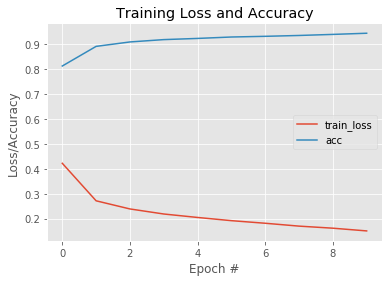

In [8]:
history_dict = history.history
print(history_dict.keys())

plt.style.use("ggplot")
plt.figure()
plt.plot(history.history["loss"], label="train_loss")
# plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(history.history["acc"], label="acc")
# plt.plot(history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

# face detect

In [6]:
from random import randint
import cv2
import sys
import os
CASCADE="Face_cascade.xml"
FACE_CASCADE=cv2.CascadeClassifier(CASCADE)

def detect_faces(image_path):

    image=cv2.imread(image_path)
    image_grey=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

    faces = FACE_CASCADE.detectMultiScale(image_grey,scaleFactor=1.16,minNeighbors=5,minSize=(25,25),flags=0)

    for x,y,w,h in faces:
        sub_img=image[y-10:y+h+10,x-10:x+w+10]
        os.chdir("Faces")
        image = cv2.resize(image,(180,192))

        os.chdir("../")
#        cv2.rectangle(image,(x,y),(x+w,y+h),(255, 255,0),2)

#    cv2.imshow("Faces Found",image)
    if (cv2.waitKey(0) & 0xFF == ord('q')) or (cv2.waitKey(0) & 0xFF == ord('Q')):
        cv2.destroyAllWindows()

if __name__ == "__main__":
    
    if not "Faces" in os.listdir("."):
        os.mkdir("Faces")

    detect_faces(sys.argv[1])


IndentationError: expected an indented block (<ipython-input-6-25717856605b>, line 16)